In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots
import xgboost as xgb

# magic word for producing visualizations in notebook
%matplotlib inline
df = pd.read_csv("data/defaultsmall.csv",sep=',')

In [2]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,1003.658899,199.8245349,8.28728978,3.093225456,1.944370648,29.20331683,1.498007487,0.115042467,Mean
0,19970101,2178.85,250.00,6.0,4,1,0,2,0,439.224768,335.437237,7.108381,1.560034,2.31555,13.277721,0.500006,0.31908,SD
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0,999.000000,100.000000,6.000000,3.000000,1.00000,28.000000,1.000000,0.00000,Median
2,19970101,1107.67,125.00,5.0,1,0,0,2,0,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.00000,min
3,19970102,950.44,237.61,9.0,5,0,0,1,0,9371.250000,9371.250000,120.000000,5.000000,8.00000,99.000000,2.000000,1.00000,Max
4,19970103,1436.00,250.00,9.0,3,0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 18 columns):
enrolldt       24843 non-null int64
price          24843 non-null float64
downpmt        24843 non-null float64
monthdue       24843 non-null float64
pmttype        24843 non-null int64
use            24843 non-null int64
age            24843 non-null int64
gender         24843 non-null int64
default        24843 non-null int64
1003.658899    4 non-null float64
199.8245349    4 non-null float64
8.28728978     4 non-null float64
3.093225456    4 non-null float64
1.944370648    4 non-null float64
29.20331683    4 non-null float64
1.498007487    4 non-null float64
0.115042467    4 non-null float64
Mean           4 non-null object
dtypes: float64(11), int64(6), object(1)
memory usage: 3.4+ MB


In [4]:
df.columns

Index(['enrolldt', 'price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default', '1003.658899', '199.8245349', '8.28728978',
       '3.093225456', '1.944370648', '29.20331683', '1.498007487',
       '0.115042467', 'Mean'],
      dtype='object')

In [5]:
df = df[['enrolldt', 'price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default']]

In [34]:
df.info()
df['gender'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 10 columns):
enrolldt       24843 non-null int64
price          24843 non-null float64
downpmt        24843 non-null float64
monthdue       24843 non-null float64
pmttype        24843 non-null int64
use            24843 non-null int64
age            24843 non-null int64
gender         24843 non-null int64
default        24843 non-null int64
enrolldt_ts    24843 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 1.9 MB


1.498007487018476

In [7]:
df.describe()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1.997814e+07,1003.658899,199.824535,8.287290,3.093225,1.944371,29.203317,1.498007,0.115042
std,6.825852e+03,439.224768,335.437237,7.108381,1.560034,2.315550,13.277721,0.500006,0.319080
min,1.997010e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.997082e+07,699.000000,49.000000,5.500000,1.000000,0.000000,22.000000,1.000000,0.000000
50%,1.998033e+07,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1.998101e+07,1249.000000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,1.999033e+07,9371.250000,9371.250000,120.000000,5.000000,8.000000,99.000000,2.000000,1.000000


In [8]:
df['enrolldt_ts'] = pd.to_datetime(df['enrolldt'],format='%Y%m%d', errors='coerce')

In [27]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,enrolldt_ts
0,19970101,2178.85,250.00,6.0,4,1,0,2,0,1997-01-01
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0,1997-01-01
2,19970101,1107.67,125.00,5.0,1,0,0,2,0,1997-01-01
3,19970102,950.44,237.61,9.0,5,0,0,1,0,1997-01-02
4,19970103,1436.00,250.00,9.0,3,0,0,2,0,1997-01-03


In [39]:
dff['sex'] = dff['gender'] -1

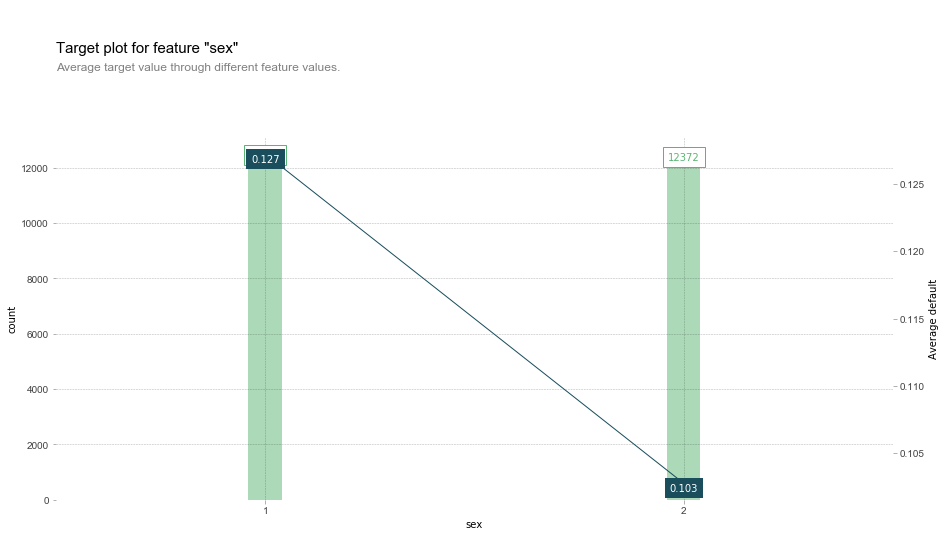

In [44]:

fig, axes, summary_df = info_plots.target_plot(
    df=dff, feature='sex', feature_name='sex', target='default'
)
_ = axes['bar_ax'].set_xticklabels([1, 2])

In [43]:
summary_df

,x,display_column,value_lower,value_upper,count,default
0,0,"[1, 2]",1.0,2.0,24843,0.115042


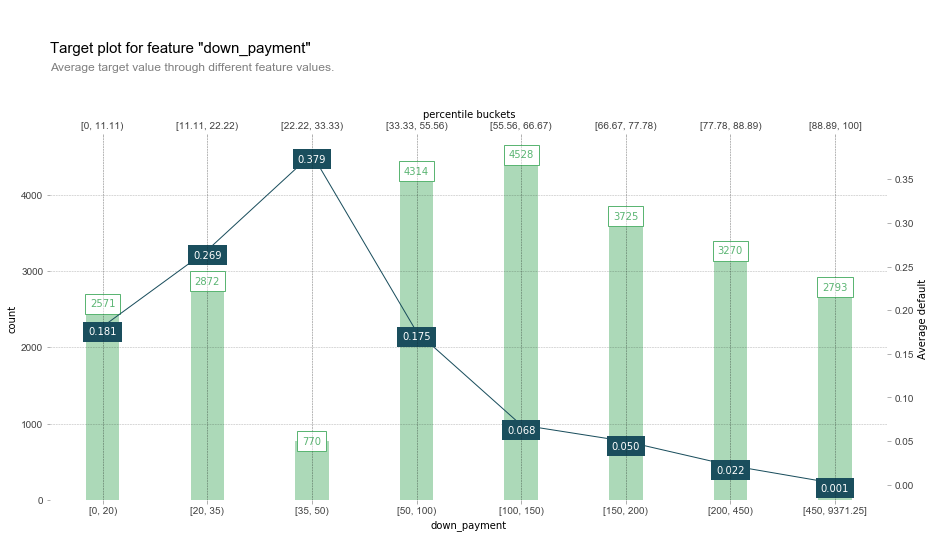

In [49]:
fig, axes, summary_df = info_plots.target_plot(
    df=dff, feature='downpmt', feature_name='down_payment', target='default', show_percentile=True
)

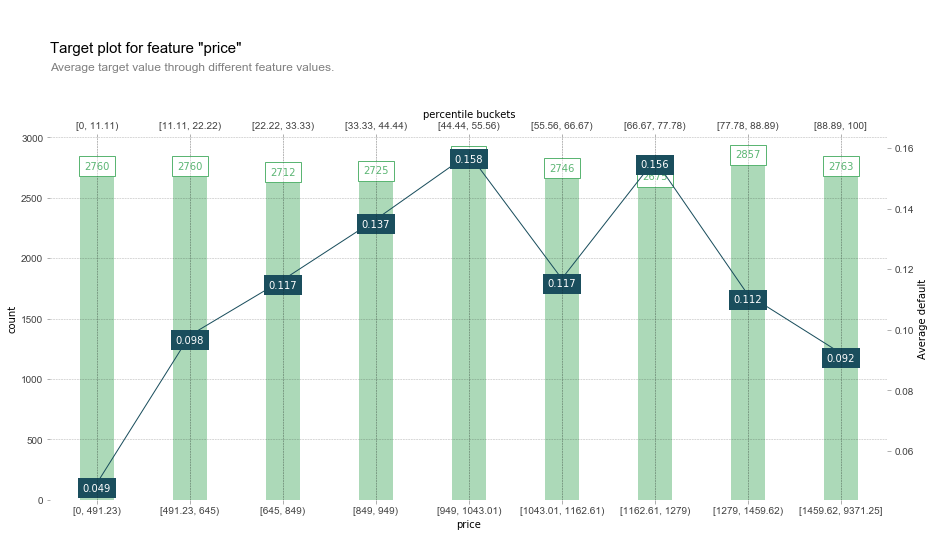

In [50]:
fig, axes, summary_df = info_plots.target_plot(
    df=dff, feature='price', feature_name='price', target='default', show_percentile=True
)